In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#First we need to load the required XML classifiers. Then load our input image (or video) in gray scale mode.

In [4]:
img=cv2.imread(r"C:\Users\RASHMI RANJAN JENA\Desktop\Jupyter\Celebrities_face_recognition_module\model\dataset\amrita_nayak\th (4).jpg")

In [5]:
img.shape

(164, 131, 3)

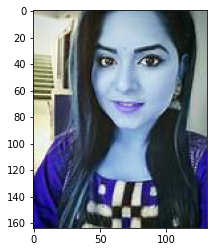

In [6]:
plt.imshow(img)

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(164, 131)

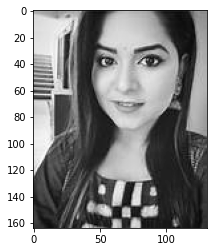

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\RASHMI RANJAN JENA\Desktop\Jupyter\Celebrities_face_recognition_module\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\RASHMI RANJAN JENA\Desktop\Jupyter\Celebrities_face_recognition_module\model\opencv\haarcascades\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[34, 10, 77, 77]])

In [10]:
(x,y,w,h)=faces[0]
x,y,w,h

(34, 10, 77, 77)

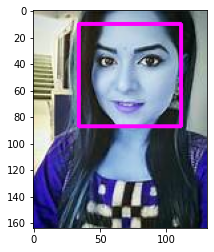

In [11]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
plt.imshow(face_img)

In [12]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)    
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),1)
        cv2.imshow('Face Detection',face_img)
        cv2.waitKey(0)
        
cv2.destroyAllWindows()

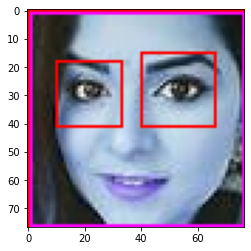

In [13]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

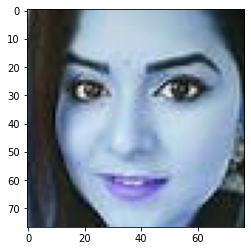

In [15]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\RASHMI RANJAN JENA\Desktop\Jupyter\Celebrities_face_recognition_module\model\dataset\amrita_nayak\th (4).jpg")
plt.imshow(cropped_image)

In [16]:
path_to_dataset="./dataset/"
path_to_data="./model/"
path_to_cr_data= r"C:\Users\RASHMI RANJAN JENA\Desktop\Jupyter\Celebrities_face_recognition_module\model\cropped"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/aman_dhattarwal',
 './dataset/amrita_nayak',
 './dataset/prafull_billore',
 './dataset/ranveer_allahbadia',
 './dataset/vivek_bindra']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs=[]
Youtuber_file_names_dict = {}

for img_dir in img_dirs:
    Youtuber_name = img_dir.split('/')[-1]
    print(Youtuber_name)

aman_dhattarwal
amrita_nayak
prafull_billore
ranveer_allahbadia
vivek_bindra


In [21]:
cropped_image_dirs=[]
Youtuber_file_names_dict = {}

for img_dir in img_dirs:
    count=1
    Youtuber_name = img_dir.split('/')[-1]
    Youtuber_file_names_dict[Youtuber_name] = []
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data +"/"+ Youtuber_name
            if not os.path.exists(cropped_folder):                
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = Youtuber_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            Youtuber_file_names_dict[Youtuber_name].append(cropped_file_path)
            count+=1

# Wavlete transform

In [22]:
import numpy as np
import pywt
import cv2

def w2d(img,mode = 'hear', level=1):
    imArray = img
    #Datatype conversion
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray= np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

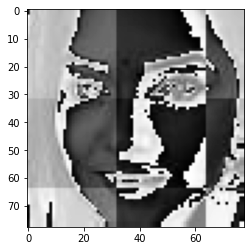

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [24]:
Youtuber_file_names_dict

{'aman_dhattarwal': ['C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/aman_dhattarwal/aman_dhattarwal1.png',
  'C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/aman_dhattarwal/aman_dhattarwal2.png'],
 'amrita_nayak': ['C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/amrita_nayak/amrita_nayak1.png',
  'C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/amrita_nayak/amrita_nayak2.png',
  'C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/amrita_nayak/amrita_nayak3.png',
  'C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/amrita_nayak/amrita_nayak4.png',
  'C:\\Users\\RASHMI RANJAN JENA\\Desktop\\Jupyter\\Celebrities_face_recognition_module\\model\\cropped/amrita_nayak/amrita_nayak5

In [25]:
class_dict = {}
count = 0
for Youtuber_name in Youtuber_file_names_dict.keys():
    class_dict[Youtuber_name] = count
    count = count+1
class_dict

{'aman_dhattarwal': 0,
 'amrita_nayak': 1,
 'prafull_billore': 2,
 'ranveer_allahbadia': 3,
 'vivek_bindra': 4}

In [26]:
x=[]
y=[]
for Youtuber_name,training_files in Youtuber_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[Youtuber_name])

In [27]:
len(x[0])

4096

In [28]:
len(y)

18

In [29]:
x[0]

array([[232],
       [244],
       [254],
       ...,
       [ 37],
       [ 53],
       [ 51]], dtype=uint8)

In [30]:
x=np.array(x).reshape(len(x),4096).astype(float)

In [31]:
x.shape

(18, 4096)

In [32]:
x[0]

array([232., 244., 254., ...,  37.,  53.,  51.])

# Now we are ready to train our model

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


1.0

In [39]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [42]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\miniconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\miniconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\miniconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.533333,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.466667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.533333,{'logisticregression__C': 5}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.8

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.8

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [52]:
best_clf = best_estimators['logistic_regression']

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

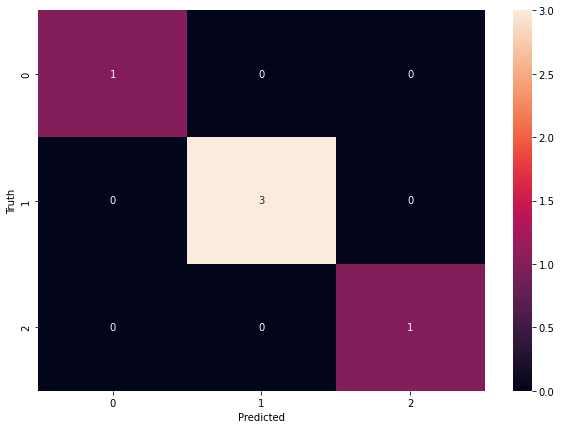

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'aman_dhattarwal': 0,
 'amrita_nayak': 1,
 'prafull_billore': 2,
 'ranveer_allahbadia': 3,
 'vivek_bindra': 4}

In [56]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))